<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#План-работы" data-toc-modified-id="План-работы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>План работы</a></span></li><li><span><a href="#Импортируем-библиотеки" data-toc-modified-id="Импортируем-библиотеки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импортируем библиотеки</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Посмотрим-скользящие-средние" data-toc-modified-id="Посмотрим-скользящие-средние-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Посмотрим скользящие средние</a></span></li><li><span><a href="#Проведем-декомпозицию-данных" data-toc-modified-id="Проведем-декомпозицию-данных-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Проведем декомпозицию данных</a></span></li></ul></li><li><span><a href="#Тест-на-стационарности" data-toc-modified-id="Тест-на-стационарности-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Тест на стационарности</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Обучим-LinearRegression" data-toc-modified-id="Обучим-LinearRegression-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Обучим LinearRegression</a></span></li><li><span><a href="#Обучим-LGBMRegressor" data-toc-modified-id="Обучим-LGBMRegressor-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Обучим LGBMRegressor</a></span></li><li><span><a href="#Обучим-CatBoostRegressor" data-toc-modified-id="Обучим-CatBoostRegressor-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Обучим CatBoostRegressor</a></span></li><li><span><a href="#Итоги-обучения-моделей" data-toc-modified-id="Итоги-обучения-моделей-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Итоги обучения моделей</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Важность-факторов" data-toc-modified-id="Важность-факторов-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Важность факторов</a></span></li><li><span><a href="#График-предсказаний" data-toc-modified-id="График-предсказаний-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>График предсказаний</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

# Описание данных

**Набор данных находится в файле:** `autos.csv`

**Признаки:**

- datetime — время с интервалом в 10 минут

**Целевой признак:**

- num_orders — число заказов за прошедшие 10 минут

## План работы

**Загрузим данные**

и выполним их ресемплирование по одному часу.

**Проанализируем данные**.

**Обучим разные модели с различными гиперпараметрами.**

**Обучим разные модели**

**Проверим данные на тестовой выборке и сделаем выводы**


## Импортируем библиотеки

In [35]:
!pip install catboost --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import datetime

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Загрузка данных

In [2]:
#Загрузим данные
try:
  data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0], sep = ',')
except:
  data = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv', index_col=[0], parse_dates=[0], sep = ',')

Устанавливаем начальный RANDOM_STATE для получения одинаковых и повторяющихся результатов вычислений при использования случайных чисел.

In [3]:
RANDOM_STATE = 12345

## Изучение данных

In [4]:
print('Первые 3 строки данных:\n')
display(data.head(3))

print('Последние 3 строки данных:\n')
display(data.head(3))

print('\nИнформация столбцах, их типах:\n')
data.info()

print('\nОбщее описание данных:\n')
display(data.describe())


Первые 3 строки данных:



,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28


Последние 3 строки данных:



,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28



Информация столбцах, их типах:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB

Общее описание данных:



,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


В целом данные выглядят нормально. Пропусков нет и слишком необычных выбросов не наблюдается. У нас есть данные по заказам с первого марта 2018 года по 31 августа 2018 года.

Проверим что даты в индексе идут последовательно:

In [5]:
print(data.index.is_monotonic_increasing)

True


Да, данные расположены последовательно по времени. Сортировка не требуется.

## Подготовка

Проведем ресемплирование данных по одному часу.

In [6]:
print('Число данных до ресемплирования:', data.shape[0])
data = data.resample('1H').sum()
print('Число данных после ресемплирования:', data.shape[0])

Число данных до ресемплирования: 26496
Число данных после ресемплирования: 4416


Добавим признаки для прогнозирования

In [7]:
def make_features(in_df):
  # Копируем переданный в качестве параметра датафрейм
  # и добавляем признаки в копию датафрейма, который возвращаем потом
  df = in_df.copy()

  #Чтобы учесть влияние дня недели
  df['dayofweek'] = df.index.dayofweek

  #Чтобы учесть влияние месяца
  df['month'] = df.index.month

  #Добавим лаг в 1 час
  df['lag_1_hour'] = df['num_orders'].shift(1)

  #Добавим лаг в 1 день
  df['lag_1_day'] = df['num_orders'].shift(24)

  #Добавим лаг в 1 неделю
  df['lag_1_week'] = df['num_orders'].shift(168)

  #Добавим признак скользящее среднее с окном размером 7*24. Одна неделя
  df['rolling_mean_week'] = df['num_orders'].shift().rolling(168).mean()

  #Добавим признак скользящее среднее с окном размером 24. Один день
  df['rolling_mean_day'] = df['num_orders'].shift().rolling(24).mean()
  df.dropna(inplace = True)
  print('Число данных после удаления NaN:', df.shape[0])
  return df

In [8]:
df_frs = make_features(data)

Число данных после удаления NaN: 4248


## Анализ

### Посмотрим скользящие средние

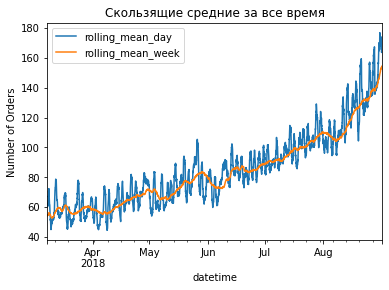

In [9]:
df_frs.loc[:, ['rolling_mean_day', 'rolling_mean_week']].plot()
plt.title('Скользящие средние за все время')
plt.ylabel("Number of Orders")
plt.show()

Наблюдаем возрастающий тренд роста числа заказов.

Посмотрим графики заказов и скользящие средние более подробно за последний месяц.

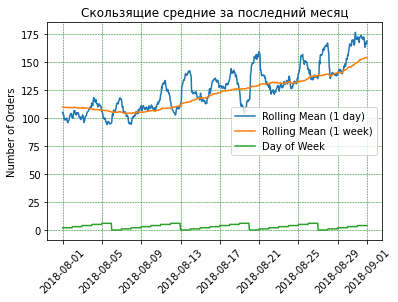

In [10]:
data_month = df_frs.loc['2018-08-01':'2018-08-31', :]

plt.plot(data_month.index, data_month.loc[:,['rolling_mean_day', 'rolling_mean_week', 'dayofweek']])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Скользящие средние за последний месяц')
plt.xticks(rotation=45)
plt.ylabel("Number of Orders")
plt.legend(labels=['Rolling Mean (1 day)', 'Rolling Mean (1 week)', 'Day of Week'])
plt.show()

Видим, что есть зависимость колебаний по дням недели.

Посмотрим графики заказов и скользящие средние более подробно за два дня.

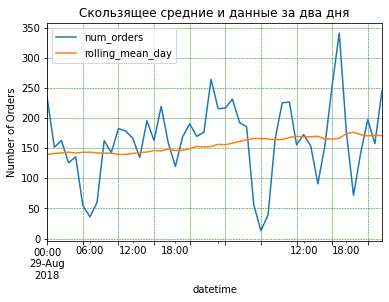

In [11]:
df_frs.loc['2018-08-29':'2018-08-30', ['num_orders', 'rolling_mean_day']].plot()
plt.title('Скользящее средние и данные за два дня')
plt.xticks(df_frs.loc['2018-08-29':'2018-08-30',:].index[::5])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.ylabel("Number of Orders")
plt.show()

Видим, что есть зависимость колебаний от часа в сутках. Ближе к 6 часам утра наблюдается минимум заказов. Пик заказов приходится на вечер после 18:00

### Проведем декомпозицию данных

In [12]:
# функция для перевода номера дня недели в краткое имя
def get_weekday_name(day):
    return datetime.date(2021, 1, day).strftime('%a')

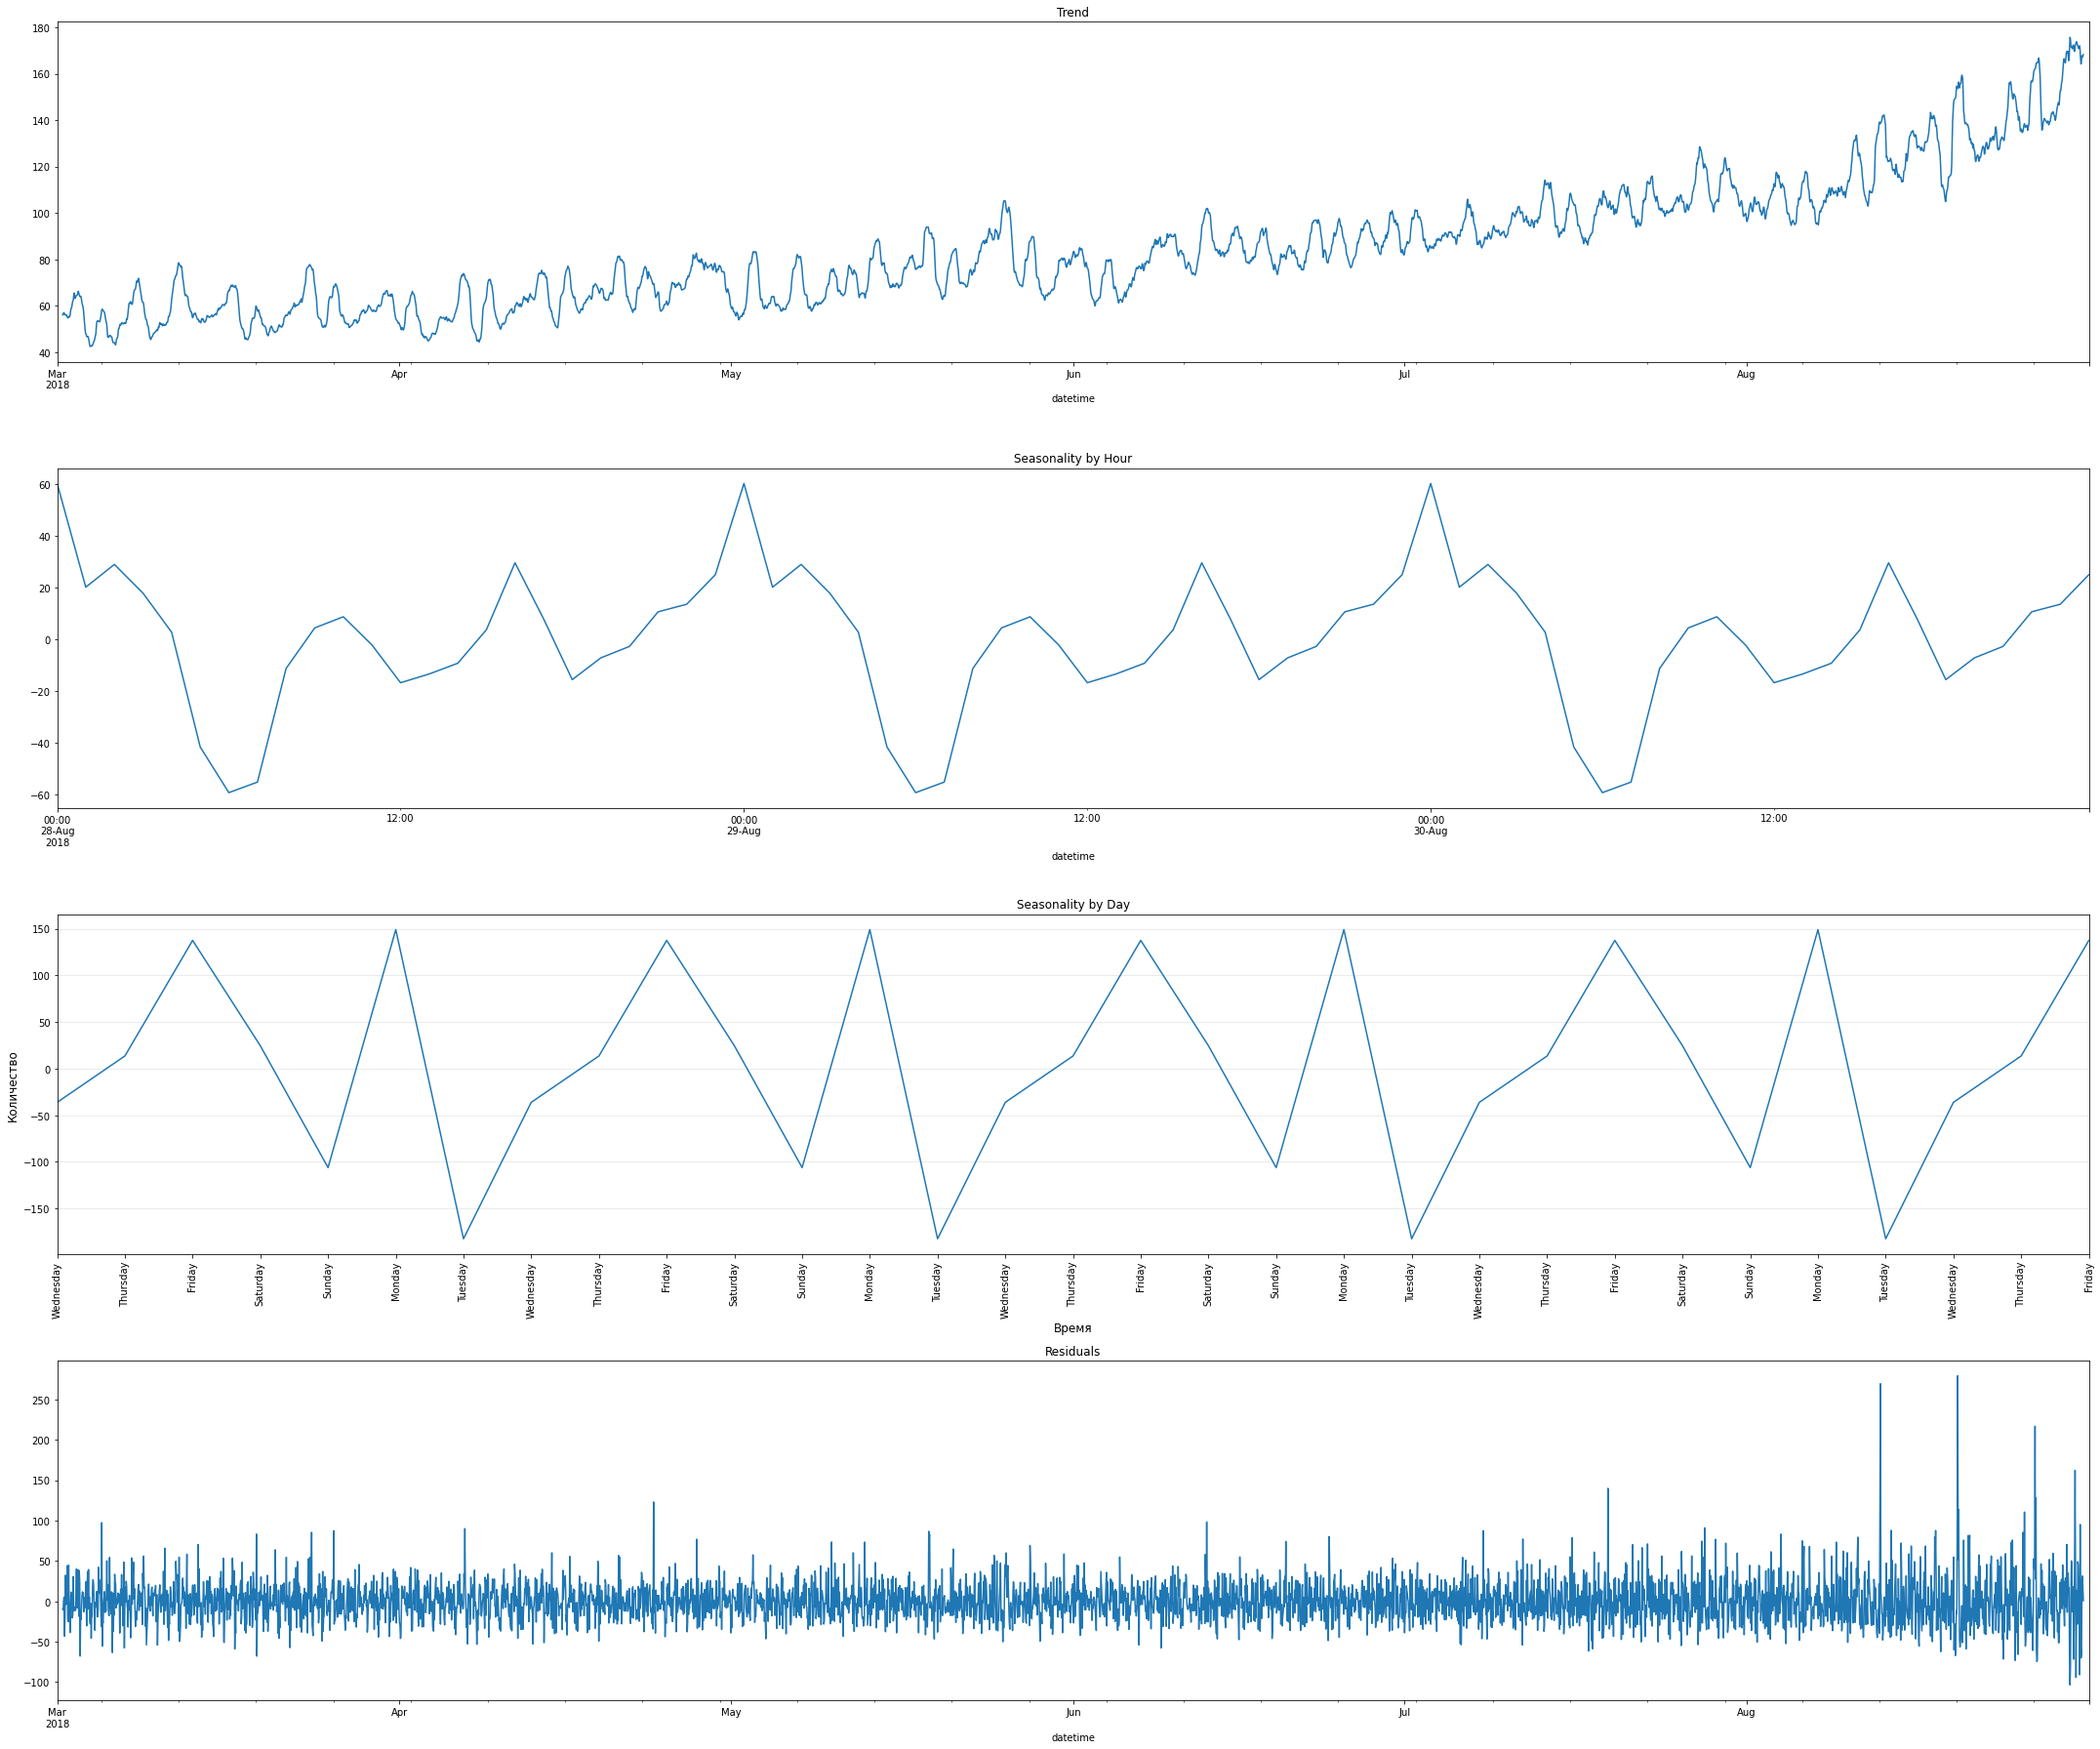

In [13]:
# Проведем декомпозицию данных
decomposed = seasonal_decompose(data)

# Сделаем ресемплирование данных по дням, чтобы увидеть сезонность в разрезе дней
data_day = data.resample('1D').sum()
decomposed_day = seasonal_decompose(data_day)

# Задаем размер графика
# plt.figure(figsize=(6, 8))
plt.figure(figsize=(30, 25))

# Выводим тренд
plt.subplot(411)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

# Выводим сезонность в разрезе часов
plt.subplot(412)
decomposed.seasonal['2018-08-28':'2018-08-30'].plot(ax=plt.gca())
plt.title('Seasonality by Hour')

# Выводим сезонность в разрезе дней
plt.subplot(413)
dec_day = decomposed_day.seasonal['2018-08-01':'2018-08-31']
dec_day.plot(ax=plt.gca())

plt.xticks(ticks= dec_day.index,
           labels = dec_day.index.day_name(),
           rotation=90)
plt.xlabel("dayofweek", fontsize=12, color='black')
plt.xlabel('Время', fontsize=12, color='black')
plt.ylabel('Количество', fontsize=12, color='black')
plt.grid(axis='y', alpha=.3)
plt.title('Seasonality by Day')

# Выводим остатки
plt.subplot(414)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Разложив данные на тренд, сезонность и шум видим что в данных о числе заказов наблюдается возрастающий тренд.

Наблюдается ярко выраженная сезонность в зависимости от времени суток и дня недели. Наблюдаются провалы ближе к 6 утра, а так же во вторник и воскресенье. Пики приходятся на 24:00, а так же на понедельник и четверг.

Видим значительные остатки, шум, который нарастает во второй половине последнего месяца и, наверняка, снизит точность предсказаний.

In [14]:
#x = data['num_orders'].values
#result = adfuller(x)
#print('ADF Statistics: %f' % result[0])
#print('p-value: %f' % result[1])
#print('Critical value:')
#for key, value in result[4].items():
#    print('\t%s: %.3f' % (key,value))
    
#if result[0] < result[4]["5%"]:
#    print('Reject Ho - Time series is stationary')
#else:
#    print('Failed to Reject Ho - Time Series is Non-stationary')


#так как у нас по `p-value` = 2.8% ~ 5% , сравниваем наш результат ADF с критическим значением на 5%:
#Получается так, что `ADF Statistics = -3.069` < `Critical value = -2.862`
#Гипотиза подвергается -> Временный ряд стационнарен

In [49]:
#data.plot(figsize = (14, 8), title = 'Number of orders')

#result = adfuller(data['num_orders'], autolag='AIC', maxlag=None, regression='c', store=False, regresults=False)

#print('Критерий ADF: %f' % result[0])

#print('P-значение: %f' % result[1])

#print('Критические значения:')

#for key, value in result[4].items():
#    print('\t%s: %.3f' % (key, value))
#if result[0] < result[4]["5%"]:
#    print ("Нулевая гипотеза отвергнута – Временной ряд стационарен")
#else:
#    print ("Нулевая гипотеза не отвергнута – Временной ряд не стационарен")
    

## Тест на стационарности

In [16]:
#def Plotprocess(n_samples= len(data['num_orders']), beta = 0):
#    y = u = data
#    t = 'num_orders'
#    y[t] = beta * y[t][-1] + u[t]
    
#    with plt.style.context('bmh'):
#        plt.figure(figsize = (10, 3))
#        plt.plot(y)
#        p_adf = round(adfuller(y)[1], 3)
#        plt.title(f"Beta: {beta}/n Dicky_Fuller p-value: {p_adf}")
        
#for beta in [0, 0.95, 0.99]:
#    Plotprocess(beta = beta)

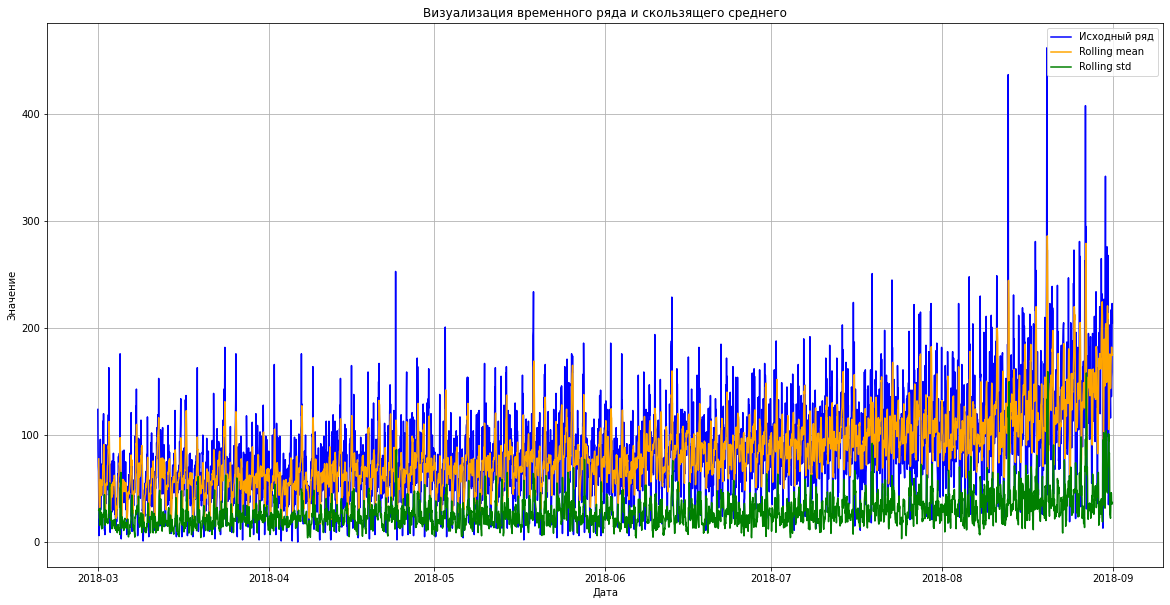

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка временного ряда (предполагается, что у вас есть данные временного ряда в формате DataFrame с колонкой "value" и индексом "date")
# Пример:
# data = pd.read_csv('your_time_series_data.csv', parse_dates=['date'], index_col='date')

# Определение размера окна для скользящего среднего
window_size = 5

# Вычисление скользящего среднего
smoothed_series = data['num_orders'].rolling(window=window_size).mean()
std_series = data['num_orders'].rolling(window = window_size).std()
# Создание графика
plt.figure(figsize=(20, 10))

# Исходный ряд
plt.plot(data.index, data['num_orders'], label='Исходный ряд', color='blue')

# Сглаженные ряды
plt.plot(data.index, smoothed_series, label=f'Rolling mean', color='orange')
plt.plot(data.index, std_series, label=f'Rolling std', color='green')


plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Визуализация временного ряда и скользящего среднего')
plt.legend()
plt.grid(True)
plt.show()


Тренд - восходящий, видимо поездки за исследуемый период только увеличивались. Временной ряд не стационарный - у него меняется среднее значение.

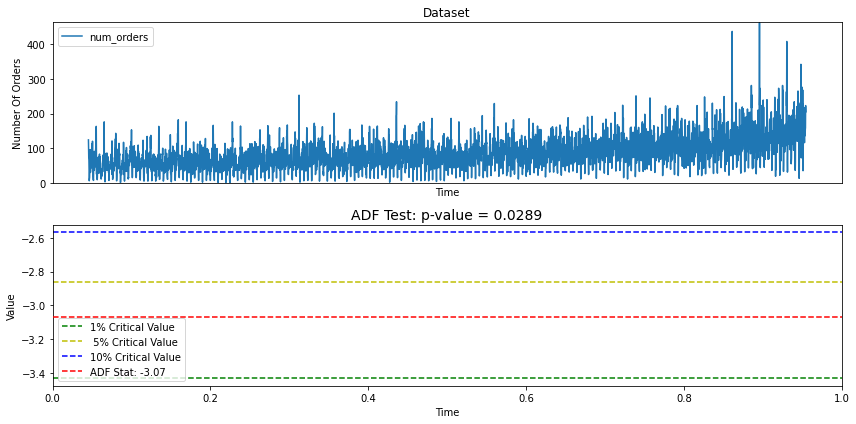

In [48]:
# Perform ADF test
result = adfuller(data['num_orders'])

# Extract ADF test statistics and p-value
adf_stat = result[0]
p_value = result[1]

# Set figure sizes
plt.figure(figsize=(12, 6))

# Create subplots
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

# Plot the dataset on the first subplot
ax1.plot(data['num_orders'], label='num_orders')
ax1.legend()
ax1.set_xlabel('Time')
ax1.set_ylabel('Number Of Orders')
ax1.set_title('Dataset')

# Customize y-axis limits for the dataset plot
y_min = min(data['num_orders']) - 1
y_max = max(data['num_orders']) + 1
ax1.set_ylim(y_min, y_max)

# Plot the critical values on the second subplot
ax2.axhline(y=result[4]['1%'], color='g', linestyle='--', label=f'1% Critical Value', zorder=2)
ax2.axhline(y=result[4]['5%'], color='y', linestyle='--', label=f' 5% Critical Value', zorder=2)
ax2.axhline(y=result[4]['10%'], color='blue', linestyle='--', label=f'10% Critical Value', zorder=2)
    
ax2.axhline(y=adf_stat, color='r', linestyle='--', label=f'ADF Stat: {adf_stat:.2f}', zorder=3)

ax2.legend()
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.set_title(f'ADF Test: p-value = {p_value:.4f}', fontsize =14)

# Customize y-axis limits for the axhlines plot
#ax2.set_ylim(y_min, y_max)

# Remove x-axis labels from the first subplot
ax1.set_xticks([])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

**Формулирование гипотез:**

*Нулевая гипотеза (H0)*: Временной ряд нестационарен (присутствует единичный корень).

*Альтернативная гипотеза (H1)*: Временной ряд стационарен (единичного корня нет).

Если p-value меньше выбранного вами уровня значимости --> то отклоняем нулевую гипотезу (Временный Ряд Стационнарен)

У нас p-value = 0.029, и оно больше всех критических значении (так как ADF stat меньше знаения у критических значении 1% и 5%, это говорит о том,что есть статистически значимая поддержка для отклонения от нулевой гипотезы (нестационнарности ряда), поэтому нулевая гипетеза не отвергается, и наш временный ряд, получается **не стационнарен**

- Судя по тому, что я понял, в данном случае мы имеем дело с суточной сезонностью. Нет сезонности в зависимости от сезона(лето/осень/зима/весна) т.к. мы наблюдает стабильный рост заказаов с начала анализируемого периода;
- Ближе к вечеру поток поездок увеличивается, а рано утром он самый слабый;
- Судя, по всему большая часть полетов приходится на вечерное время, а не на утреннее т.к. после работы у людей меньше всего свободного времени которым они распологаеют до начала рейса. Если, условно, рейс утром, то люди берут отгул или у них уже начался отпуск и они имеют возможность заранее приехать в аэропорт.

## Обучение

Разобьем данные на выборки

In [ ]:
train, test = train_test_split(df_frs, shuffle=False, test_size=0.1)

# Тренировочная выборка
y_train = train['num_orders']
X_train = train.drop('num_orders', axis=1)

# Тестовая выборка
y_test = test['num_orders']
X_test = test.drop('num_orders', axis=1)

### Обучим LinearRegression

In [ ]:
model = LinearRegression()
tscv = TimeSeriesSplit(n_splits=3)
param_search = {}
gsearch_lregr = GridSearchCV(estimator=model, cv=tscv,
                             scoring='neg_root_mean_squared_error',
                             param_grid=param_search)
gsearch_lregr.fit(X_train, y_train)

# Выводим лучшие параметры поиска
print('LinearRegression:')
print(f'Лучшие параметры: {gsearch_lregr.best_params_}')
lregr_rmse = gsearch_lregr.best_score_*(-1)
print(f'RMSE для лучших параметров:', round(lregr_rmse, 2))

### Обучим LGBMRegressor

In [ ]:
%%time
# Гиперпараметры для перебора
param_grid_lgb = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [300]
}

# Инициализируем LGBMRegressor estimattor
estimator = lgb.LGBMRegressor(objective='regression',
                              random_state=RANDOM_STATE,
                              n_estimators=300)

# Инициализируем Grid Search
model_lgb = GridSearchCV(estimator=estimator,
                     param_grid=param_grid_lgb,
                     cv=tscv,
                     n_jobs=-1,
                     scoring='neg_root_mean_squared_error',
                     verbose=1)
model_lgb.fit(X_train, y_train)

# Выводим лучшие параметры поиска
print('LGBMRegressor:')
print(f'Лучшие параметры: {model_lgb.best_params_}')
lgb_rmse = model_lgb.best_score_*(-1)
print(f'RMSE для лучших параметров:', round(lgb_rmse, 2))

### Обучим CatBoostRegressor

In [ ]:
%%time

param_grid_cat_boost = {
    'depth': [6, 10],
    'learning_rate': [0.1, 0.03],
}

# Инициализируем CatBoostRegressor estimattor
estimator = CatBoostRegressor(loss_function="RMSE", iterations=100, random_state=RANDOM_STATE)

# Инициализируем Grid Search
model_cat_boost = GridSearchCV(estimator=estimator,
                     param_grid=param_grid_cat_boost,
                     cv=tscv,
                     n_jobs=-1,
                     scoring='neg_root_mean_squared_error',
                     verbose=10)
model_cat_boost.fit(X_train, y_train, verbose=30)

# Выводим лучшие параметры поиска
print('CatBoostRegressor:')
print(f'Лучшие параметры: {model_cat_boost.best_params_}')
cat_boost_rmse = model_cat_boost.best_score_*(-1)
print(f'RMSE для лучших параметров:', round(cat_boost_rmse, 2))

### Итоги обучения моделей

In [ ]:
result_df = pd.DataFrame({'RMSE': [lregr_rmse, lgb_rmse, cat_boost_rmse]},
                          index = ['LinearRegression', 'LGBMRegressor', 'CatBoostRegressor'])
result_df.sort_values(by='RMSE').round(2)

Лучший результат при валидации показала линейная регрессия.

## Тестирование

Будем использовать LinearRegression для предсказаний на тестовой выборке.

In [ ]:
prediction_lregr = gsearch_lregr.predict(X_test)
print('RMSE = ', round(mean_squared_error(y_test, prediction_lregr, squared=False),2))

## Важность факторов

In [ ]:
#Масштабирование
scaler = StandardScaler()
X_train = pd.DataFrame(data = scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_train.columns)

model = LinearRegression()


importance_1 = model.fit(X_train, y_train)
importance_check = importance_1.coef_

for i,v in enumerate(importance_check):
    print('Features: %0d, Score: %.5f' %(i,v))

features = X_train.columns
plt.figure(figsize = (20,15))
plt.bar([x for x in range(len(importance_check))], importance_check, tick_label = features)
plt.show()

Наиболее важным - лаг в одину неделю, а наименее важным - это daysofweek (недельные дни)

## График предсказаний

In [ ]:
plt.figure(figsize=(30, 25))
plt.plot(y_test.index, y_test, label = 'Рельаное число заказов')
plt.plot(y_test.index, prediction_lregr, label = 'Предсказания')
plt.title('Сравнение предсказаний с реальным числом заказов')
plt.ylabel("Number of Orders")
plt.legend()
plt.show()

Видим что ожидаемо не были предсказаны самые большие пики, и провалы, так они не связанны с сезонностью и трендом, а вероятно связаны с остатками и шумом. В то же время в целом предсказания повторяют колебания истинных данных.

In [ ]:
model_dummy = DummyRegressor(strategy = 'median')

model_dummy.fit(X_train, y_train)

prediction_dummy = model_dummy.predict(X_test)
print('RMSE = ', round(mean_squared_error(y_test, prediction_dummy, squared=False),2))

## Общий вывод

**Загрузка и изучение данных**

Данные были успешно загружены. В данных не было пропусков и слишком необычных выбросов не наблюдалось. У нас есть данные по заказам с первого марта 2018 года по 31 августа 2018 года. Данные расположены последовательно по времени


**Подготовка данных**

Было проведено ресемплирование данных по одному часу.

Добавили признаки для прогнозирования:

* `dayofweek` - день недели
* `month` - месяц
* `lag_1_hour` - лаг в один час
* `lag_1_day` - лаг в один день
* `lag_1_week` - лаг в одну неделю
* `rolling_mean_week` - скользящее среднее с окном размером 1 неделю.
* `rolling_mean_day` - скользящее среднее с окном размером в 1 день.

**Анализ**

В ходе анализа данных было выявлено следующее:

* Наблюдаем возрастающий тренд роста числа заказов.
* Видим, что есть зависимость колебаний по дням недели.Наблюдаются провалы во вторник и воскресенье. Пики приходятся на понедельник и четверг.
* Есть зависимость колебаний числа заказов от часа в сутках. Ближе к 6 часам утра наблюдается минимум заказов. Пик заказов приходится на вечер после 18:00

**Обучение моделей**

Данные были разбиты на выборки.

Были обучены с подбором параметров следующие модели:

* LinearRegression
* LGBMRegressor
* CatBoostRegressor

|Модель|RMSE|
|---|---|
|LinearRegression|23\.98|
|CatBoostRegressor|24\.28|
|LGBMRegressor|26\.58|

Лучшим при при обучении показала себя LinearRegression с RMSE = 23.98

**Тестирование**

Лучшая модель LinearRegression была протестирована на тестовой выборке:

* На тестовой выборке **RMSE составило 35.07**

**Важность факторов**

Наиболее важными фактором оказался лаг в один час. Наименее важным - месяц.

**Сравнение предсказаний и реальных заказов на графике**

Ожидаемо не были предсказаны самые большие пики, и провалы, так они не связанны с сезонностью и трендом, а вероятно связаны с остатками и шумом. В то же время, в целом предсказания повторяют колебания истинных данных.